# 01 Fourier Transforms

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Classical Implementation

Text

In [2]:
def fft(x):
    x = np.asarray(x, dtype=complex)
    N = len(x)

    if N <= 1:
        return x

    even = fft(x[::2])
    odd = fft(x[1::2])

    factor = np.exp(-2j * np.pi * np.arange(N) / N)
    return np.concatenate([even + factor[:N // 2] * odd,
                           even - factor[:N // 2] * odd])

In [3]:
def ifft(X):
    """
    Compute the Inverse FFT using the FFT itself.
    """
    X = np.asarray(X, dtype=complex)
    N = len(X)
    return fft(X.conj()).conj() / N

In [4]:
x = np.array([1.0, 2.0, 0.0, -1.0])  # Length should be a power of 2
X = fft(x)
print("FFT:", X)

x_reconstructed = ifft(X)
print("Reconstructed signal:", np.round(x_reconstructed.real, 4))
print("NumPy FFT:", np.fft.fft(x))

FFT: [2.+0.j 1.-3.j 0.+0.j 1.+3.j]
Reconstructed signal: [ 1.  2.  0. -1.]
NumPy FFT: [2.+0.j 1.-3.j 0.+0.j 1.+3.j]


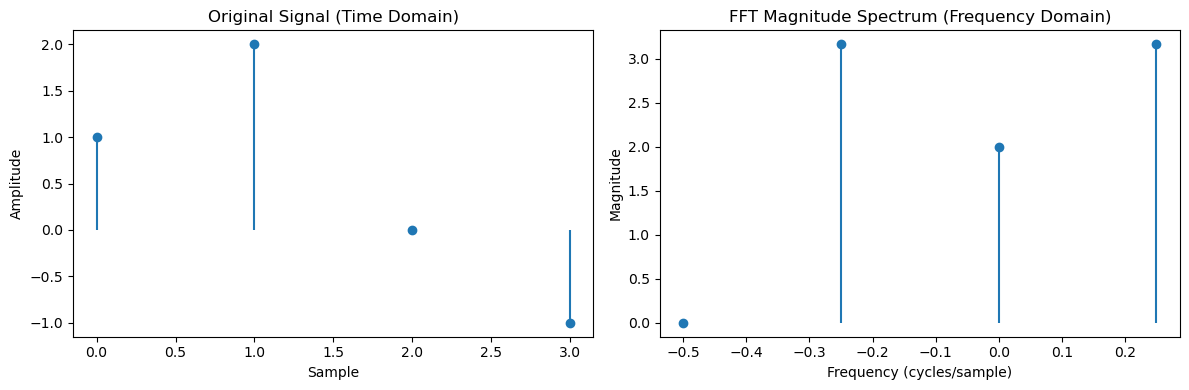

In [6]:
# Frequency bins (assuming unit sampling rate)
N = len(x)
freqs = np.fft.fftfreq(N)

# Plot original signal
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.stem(range(N), x, basefmt=" ")
plt.title("Original Signal (Time Domain)")
plt.xlabel("Sample")
plt.ylabel("Amplitude")

# Plot magnitude spectrum
plt.subplot(1, 2, 2)
plt.stem(freqs, np.abs(X), basefmt=" ")
plt.title("FFT Magnitude Spectrum (Frequency Domain)")
plt.xlabel("Frequency (cycles/sample)")
plt.ylabel("Magnitude")

plt.tight_layout()
plt.show()

# Quantum Implementation

Text